### Sine Matrix

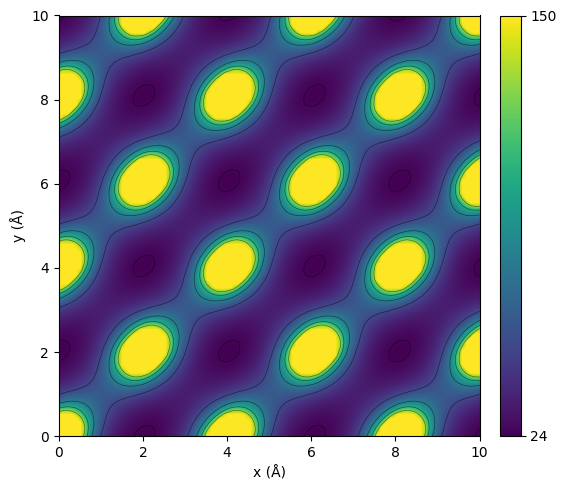

In [8]:
import numpy as np
from ase import Atoms
from ase.build import bulk
import matplotlib.pyplot as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from dscribe.descriptors import SineMatrix

# FCC aluminum crystal
system = bulk("Al", "fcc", cubic=False)

# Calculate the sine matrix entries for a 2D slice at z=0
sm = SineMatrix(
    n_atoms_max=2,
    permutation="none",
    sparse=False,
    flatten=False
)
n = 100
d = 10
grid = np.zeros((n, n))
values = np.linspace(0, d, n)
for ix, x in enumerate(values):
    for iy, y in enumerate(values):
        i_atom = Atoms(["Al"], positions=[[x, y, 0]])
        i_sys = system.copy()+i_atom
        i_sm = sm.create(i_sys)
        i_sm = i_sm[0, 1]
        grid[ix, iy] = i_sm

# Plot the resulting sine matrix values
maxval = 150
fig, ax = mpl.subplots(figsize=(6, 5))
np.clip(grid, a_min=None, a_max=maxval, out=grid)
c1 = ax.contourf(values, values, grid, levels=500)
ax.contour(values, values, grid, levels=5, colors="k", linewidths=0.5, alpha=0.5)
the_divider = make_axes_locatable(ax)
color_axis = the_divider.append_axes("right", size="5%", pad=0.2)
cbar = fig.colorbar(c1, cax=color_axis, ticks=[grid.min(), grid.max()])
ax.axis('equal')
ax.set_ylabel("y (Å)")
ax.set_xlabel("x (Å)")
mpl.tight_layout()
mpl.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fc3d2631-9178-4bf3-9db3-87923c482dce' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>